In [2]:
import stereo as st
import os
import pandas as pd
import gc
import utils
from importlib import reload
reload(utils)

<module 'utils' from '/ddnA/work/ygong/Stereo_seq_new/50_bin_analysis/Code/utils.py'>

In [2]:
######### read the data as ann h5ad files
control_list = ["B01806B5", "B01806B6", "B01809A3", "B01809A4", "D02175A4", "D02175A6"]
moderate_list = ["B02008D2", "B02009F6"]
advanced_list = ["B01809C2", "C02248B5"]
severe_list = ["A02092E1", "B02008C6"]

###### Control
# import the stereo data
for num,files in enumerate(control_list):
    data_path = "../../processed_data/{}/GeneExpMatrix/{}.tissue.gef".format(files, files)
    data = st.io.read_gef(file_path=data_path, bin_size=50)
    data.cells["diagnosis"] = "control"
    data.cells["levels"] = "control"
    data.cells["sample"] = files
    globals()[files] = data
    
##### moderate
# import the stereo data
for num,files in enumerate(moderate_list):
    data_path = "../../processed_data/{}/GeneExpMatrix/{}.tissue.gef".format(files, files)
    data = st.io.read_gef(file_path=data_path, bin_size=50)
    data.cells["diagnosis"] = "case"
    data.cells["levels"] = "moderate"
    data.cells["sample"] = files
    globals()[files] = data

#### advanced
for num,files in enumerate(advanced_list):
    data_path = "../../processed_data/{}/GeneExpMatrix/{}.tissue.gef".format(files, files)
    data = st.io.read_gef(file_path=data_path, bin_size=50)
    data.cells["diagnosis"] = "case"
    data.cells["levels"] = "advanced"
    data.cells["sample"] = files
    globals()[files] = data

#### severe_list
for num,files in enumerate(severe_list):
    data_path = "../../processed_data/{}/GeneExpMatrix/{}.tissue.gef".format(files, files)
    data = st.io.read_gef(file_path=data_path, bin_size=50)
    data.cells["diagnosis"] = "case"
    data.cells["levels"] = "severe"
    data.cells["sample"] = files
    globals()[files] = data



[2024-01-16 12:06:54][Stereo][38808][MainThread][47538041335488][reader][1042][INFO]: read_gef begin ...
[2024-01-16 12:07:07][Stereo][38808][MainThread][47538041335488][reader][1129][INFO]: the matrix has 100789 cells, and 41578 genes.
[2024-01-16 12:07:09][Stereo][38808][MainThread][47538041335488][reader][1137][INFO]: read_gef end.
[2024-01-16 12:07:09][Stereo][38808][MainThread][47538041335488][reader][1042][INFO]: read_gef begin ...
[2024-01-16 12:07:31][Stereo][38808][MainThread][47538041335488][reader][1129][INFO]: the matrix has 149221 cells, and 43983 genes.
[2024-01-16 12:07:34][Stereo][38808][MainThread][47538041335488][reader][1137][INFO]: read_gef end.
[2024-01-16 12:07:34][Stereo][38808][MainThread][47538041335488][reader][1042][INFO]: read_gef begin ...
[2024-01-16 12:07:58][Stereo][38808][MainThread][47538041335488][reader][1129][INFO]: the matrix has 123842 cells, and 42301 genes.
[2024-01-16 12:08:01][Stereo][38808][MainThread][47538041335488][reader][1137][INFO]: rea

In [3]:
data = st.utils.data_helper.merge(B01806B5, B01806B6, B01809A3, B01809A4, D02175A4, D02175A6,
                                 A02092E1, B02009F6, C02248B5, B02008C6, B02008D2, B01809C2)

[2024-01-16 12:12:02][Stereo][38808][MainThread][47538041335488][st_pipeline][41][INFO]: start to run cal_qc...
[2024-01-16 12:12:14][Stereo][38808][MainThread][47538041335488][st_pipeline][44][INFO]: cal_qc end, consume time 11.6044s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

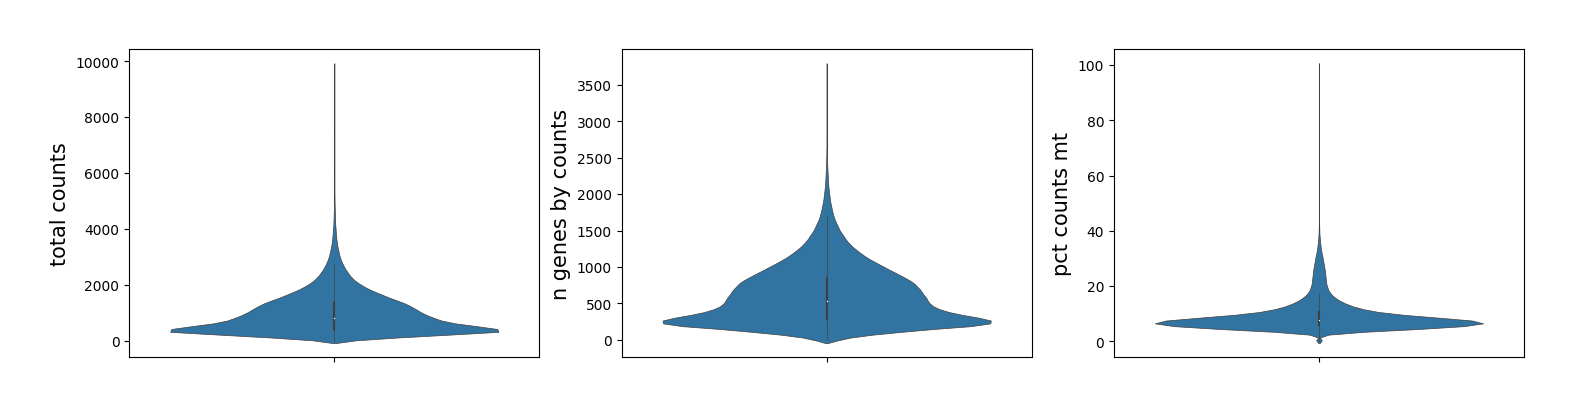

In [4]:
data.tl.cal_qc()
data.plt.violin()

In [5]:
data.tl.filter_cells(
        min_n_genes_by_counts=300,
        inplace=True
        )

[2024-01-16 12:12:23][Stereo][38808][MainThread][47538041335488][st_pipeline][41][INFO]: start to run filter_cells...
[2024-01-16 12:12:30][Stereo][38808][MainThread][47538041335488][st_pipeline][44][INFO]: filter_cells end, consume time 6.7028s.


StereoExpData object with n_cells X n_genes = 1189095 X 34208
bin_type: bins
bin_size: 50
offset_x = 0
offset_y = 0
cells: ['cell_name', 'diagnosis', 'levels', 'sample', 'batch', 'total_counts', 'n_genes_by_counts', 'pct_counts_mt']
genes: ['gene_name', 'n_cells', 'n_counts', 'mean_umi']
result: []

Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

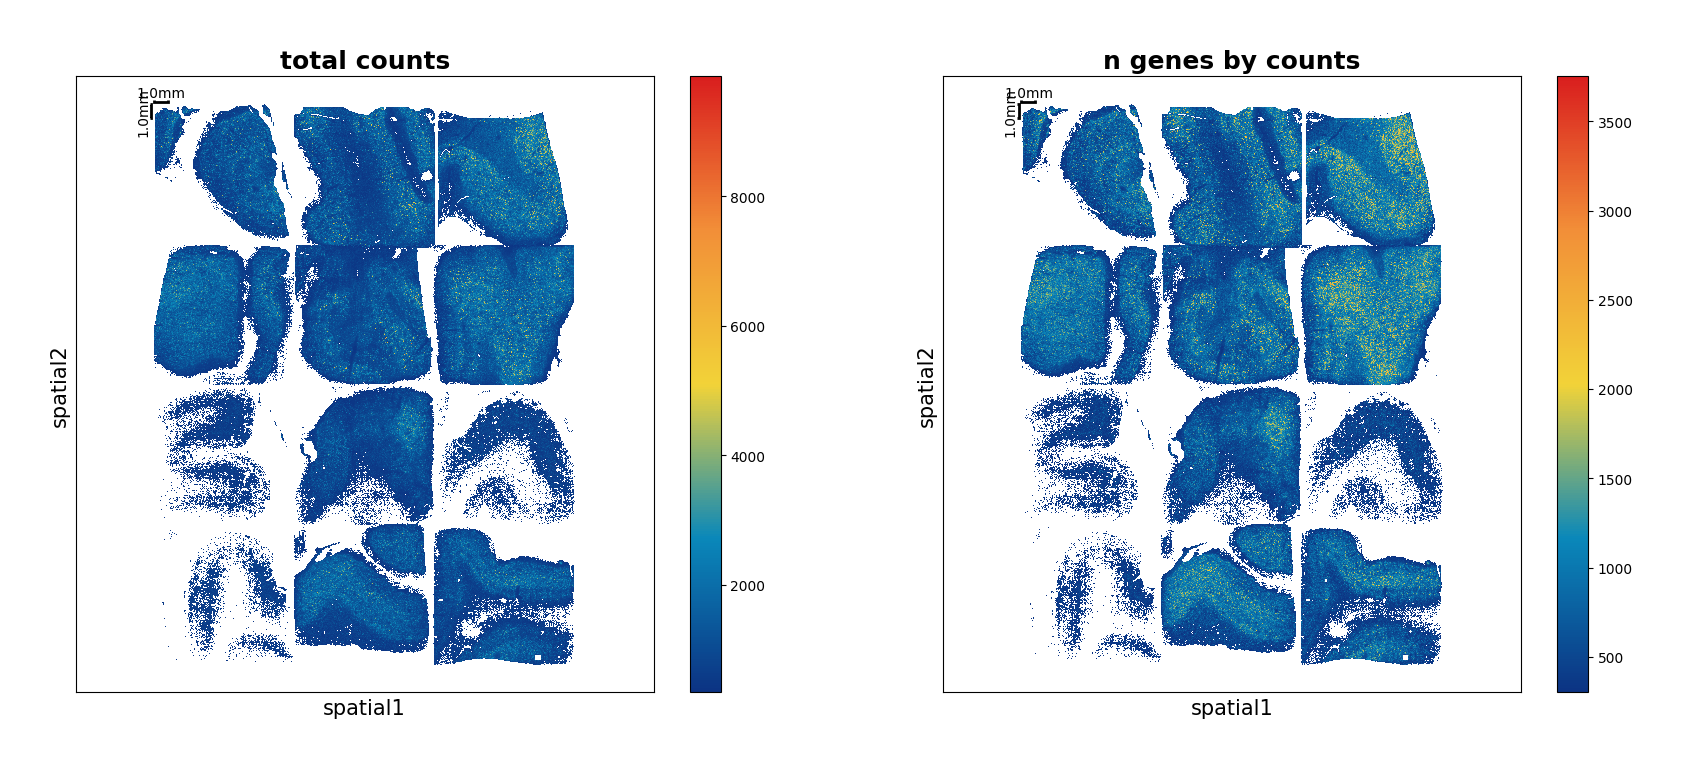

In [6]:
data.plt.spatial_scatter(reorganize_coordinate = 3)

In [7]:
data.tl.raw_checkpoint()

In [8]:
data.tl.normalize_total()
data.tl.log1p()

[2024-01-16 12:12:51][Stereo][38808][MainThread][47538041335488][st_pipeline][41][INFO]: start to run normalize_total...
[2024-01-16 12:12:58][Stereo][38808][MainThread][47538041335488][st_pipeline][44][INFO]: normalize_total end, consume time 6.7728s.
[2024-01-16 12:12:58][Stereo][38808][MainThread][47538041335488][st_pipeline][41][INFO]: start to run log1p...
[2024-01-16 12:13:01][Stereo][38808][MainThread][47538041335488][st_pipeline][44][INFO]: log1p end, consume time 3.0559s.


In [9]:
data.tl.highly_variable_genes(
        min_mean=0.0125,
        max_mean=3,
        min_disp=0.5,
        n_top_genes=2000,
        res_key='highly_variable_genes'
        )

[2024-01-16 12:13:01][Stereo][38808][MainThread][47538041335488][st_pipeline][41][INFO]: start to run highly_variable_genes...
[2024-01-16 12:13:08][Stereo][38808][MainThread][47538041335488][st_pipeline][44][INFO]: highly_variable_genes end, consume time 6.8534s.


Column
    [0] Markdown(str)
    [1] Row
        [0] TextInput(name='file name', placeholder='Enter a file name...', width=200)
        [1] Select(name='file format', options=['png', 'pdf'], value='png', width=60)
        [2] IntInput(name='dpi', placeholder='Enter the dip...', start=0, value=100, width=200)
    [2] Row
        [0] Button(button_type='primary', name='export', width=100)
        [1] StaticText(width=800)

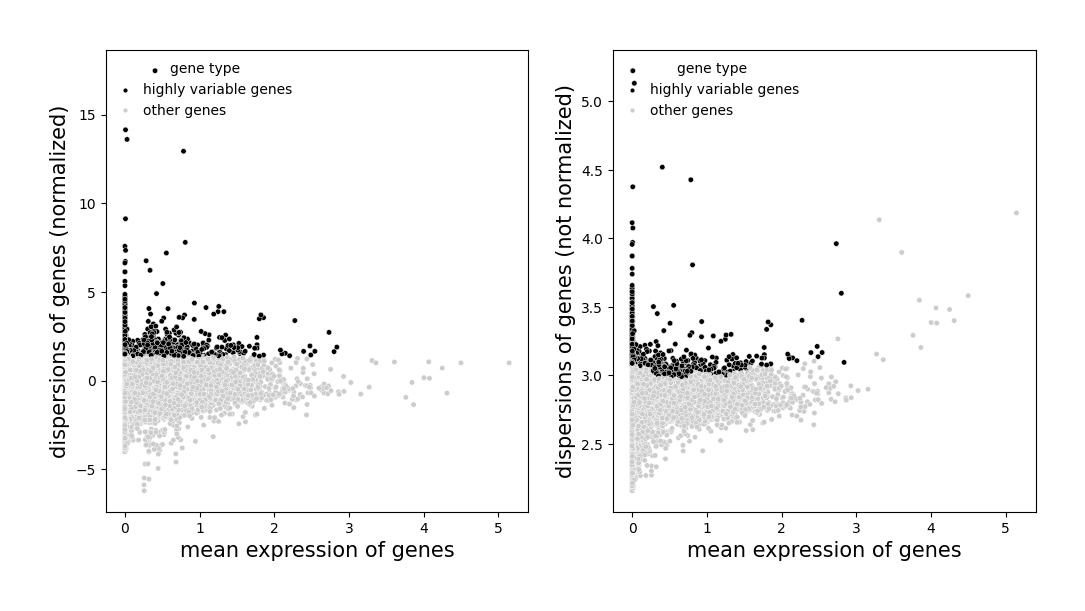

In [10]:
data.plt.highly_variable_genes(res_key='highly_variable_genes')

In [11]:
data.tl.scale(max_value=10, zero_center=True)

[2024-01-16 12:13:10][Stereo][38808][MainThread][47538041335488][st_pipeline][41][INFO]: start to run scale...


MemoryError: Unable to allocate 152. GiB for an array with shape (1189095, 34208) and data type float32

In [12]:
data.tl.pca(use_highly_genes=False, n_pcs=50, res_key='pca')

[2024-01-16 12:19:09][Stereo][38808][MainThread][47538041335488][st_pipeline][41][INFO]: start to run pca...
[2024-01-16 12:19:09][Stereo][38808][MainThread][47538041335488][dim_reduce][78][WARNING]: svd_solver: auto can not be used with sparse input.
Use "arpack" (the default) instead.
[2024-01-16 12:33:36][Stereo][38808][MainThread][47538041335488][st_pipeline][44][INFO]: pca end, consume time 867.2642s.


In [13]:
data.tl.neighbors(
        pca_res_key='pca',
        n_pcs=30,
        res_key='neighbors'
        )


[2024-01-16 12:33:36][Stereo][38808][MainThread][47538041335488][st_pipeline][41][INFO]: start to run neighbors...
[2024-01-16 12:36:01][Stereo][38808][MainThread][47538041335488][st_pipeline][44][INFO]: neighbors end, consume time 144.9552s.


In [ ]:
data.tl.umap(pca_res_key='pca', neighbors_res_key='neighbors', res_key='umap')

[2024-01-16 12:36:01][Stereo][38808][MainThread][47538041335488][st_pipeline][41][INFO]: start to run umap...


	completed  0  /  200 epochs


In [ ]:
data.tl.leiden(neighbors_res_key='neighbors', res_key='leiden')

In [ ]:
data.tl.batches_integrate(pca_res_key='pca', res_key='pca_integrated')

In [ ]:
data.tl.neighbors(
        pca_res_key='pca_integrated',
        n_pcs=30,
        res_key='neighbors'
        )

data.tl.spatial_neighbors(
        neighbors_res_key='neighbors',
        res_key='spatial_neighbors'
        )

data.tl.umap(pca_res_key='pca', neighbors_res_key='spatial_neighbors', res_key='umap')

In [ ]:
data.tl.leiden(neighbors_res_key='spatial_neighbors', res_key='spatial_leiden', resolution=1)
data.plt.cluster_scatter(res_key='spatial_leiden', reorganize_coordinate = 2)

In [ ]:
# one file save
meta = data.cells.to_df()
meta.to_csv("../Result/Stereo/One_file/meta_info")
st.io.write_h5ad(
        data,
        use_raw=True,
        use_result=True,
        key_record=None,
        output = "../Result/Stereo/One_file/bin50_integrate.h5ad",
        split_batches = False
        )

In [ ]:
st.io